In [1]:
import numpy as np
import pandas as pd

In [2]:
#laoding and reading the dataset
df = pd.read_csv('haberman.csv',header=None, names=['age','operational_year','exil_node','survival'])

In [3]:
#1st four row
df.head()

,age,operational_year,exil_node,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
#shape of the dataset
df.shape

(306, 4)

In [6]:
#checking null values
df.isnull().sum()

age                 0
operational_year    0
exil_node           0
survival            0
dtype: int64

In [7]:
df.duplicated().sum()

17

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
#no. of dublicates
df.duplicated().sum()

0

In [10]:
#dataset type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 305
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               289 non-null    int64
 1   operational_year  289 non-null    int64
 2   exil_node         289 non-null    int64
 3   survival          289 non-null    int64
dtypes: int64(4)
memory usage: 11.3 KB


In [11]:
#statistical alnalysis of data
df.describe()

,age,operational_year,exil_node,survival
count,289.000000,289.000000,289.000000,289.000000
mean,52.422145,62.906574,4.221453,1.273356
std,10.876915,3.275794,7.325239,0.446455
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.000000,66.000000,5.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [12]:
corr=df.corr()

<Axes: >

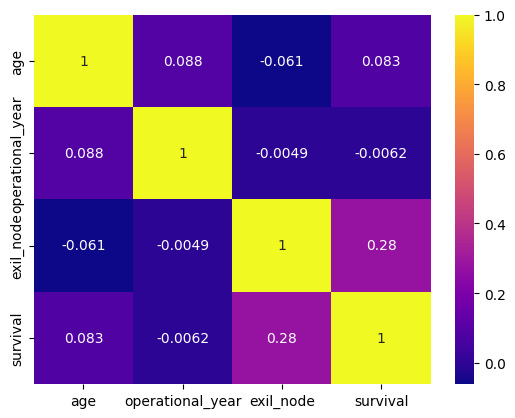

In [14]:
#plotting correlation using seaborn library
import seaborn as sns
sns.heatmap(corr,annot=True, cbar=True,cmap='plasma')

<ipython-input-15-def054b4fa7f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['operational_year'])


<Axes: xlabel='operational_year', ylabel='Density'>

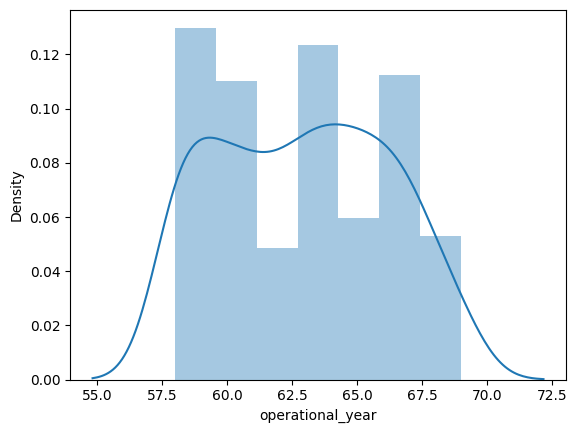

In [15]:
sns.distplot(df['operational_year'])

<Axes: xlabel='age', ylabel='Count'>

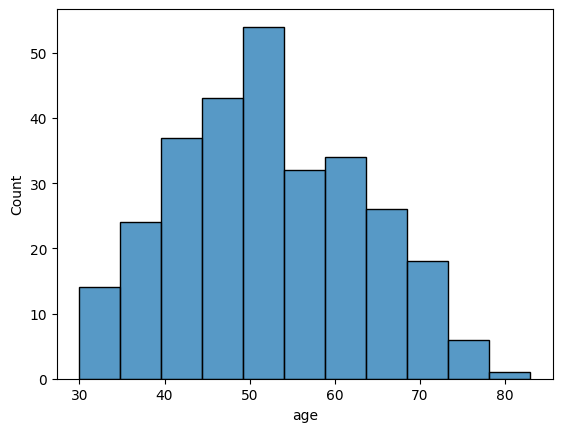

In [16]:
#age distribution
sns.histplot(df['age'])

<Axes: xlabel='age', ylabel='survival'>

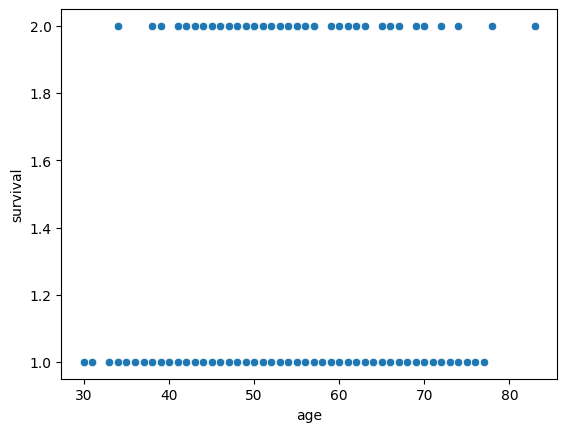

In [17]:
#scatter plot between age and surivival
sns.scatterplot(x=df['age'],y=df['survival'])

In [18]:
#Data splitting
X = df.drop("survival",axis=1)
y = df['survival']

In [19]:
X.shape

(289, 3)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
[152]

[152]

In [22]:
X_train.shape

(231, 3)

In [23]:
X_test.shape

(58, 3)

In [24]:
y_train.shape

(231,)

In [25]:
y_test.shape

(58,)

In [30]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()

In [31]:
#Normailization
sclr.fit(X_train)
X_train = sclr.transform(X_train)
X_test = sclr.transform(X_test)

In [32]:
#category counts in target variable
df['survival'].value_counts()

survival
1    210
2     79
Name: count, dtype: int64

Fitting Models

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [34]:
models = {
    'lg':LogisticRegression(),
    'dtc':DecisionTreeClassifier(),
    'gnb':GaussianNB()
}

In [36]:
#accuracy of all algoirthm which we've fit
for name, mod in models.items():
    mod.fit(X_train,y_train)
    y_pred = mod.predict(X_test)

    print(f"{name} with accuracy : {accuracy_score(y_test,y_pred)}")



lg with accuracy : 0.7413793103448276
dtc with accuracy : 0.5344827586206896
gnb with accuracy : 0.7758620689655172


In [37]:
#Decision tree alorithm
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.predict(X_test)

array([1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1])

Prediction System

In [38]:
def pred(age,oy,en):
    features = np.array([[age,oy,en]])
    features = sclr.fit_transform(features)
    pred = dtc.predict(features).reshape(1,-1)
    return pred[0]


age = 50
oy = 61
en = 2

res = pred(age,oy,en)